Genpact Machine Learning Hackathon
Your client is a meal delivery company which operates in multiple cities. They have various **fulfillment centers** in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, **staffing of the centers** is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

Historical data of demand for a product-center combination (Weeks: 1 to 145)
Product(Meal) features such as category, sub-category, current price and discount
Information for fulfillment center like center area, city information etc.

In [1]:
# Import the Libaries

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML/Day_5/train_GzS76OK (1)/train.csv')
meal = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML/Day_5/train_GzS76OK (1)/meal_info.csv')
centres = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML/Day_5/train_GzS76OK (1)/fulfilment_center_info.csv')
sample = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML/Day_5/sample_submission_hSlSoT6 (1).csv')
test = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML/Day_5/test_QoiMO9B (1).csv')

In [4]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:
test.columns,train.columns,centres.columns,sample.columns,test.columns,meal.columns

(Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
        'emailer_for_promotion', 'homepage_featured'],
       dtype='object'),
 Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
        'emailer_for_promotion', 'homepage_featured', 'num_orders'],
       dtype='object'),
 Index(['center_id', 'city_code', 'region_code', 'center_type', 'op_area'], dtype='object'),
 Index(['id', 'num_orders'], dtype='object'),
 Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
        'emailer_for_promotion', 'homepage_featured'],
       dtype='object'),
 Index(['meal_id', 'category', 'cuisine'], dtype='object'))

In [6]:
# combine Train and Test 

In [7]:
combined=pd.concat([train,test],ignore_index=True)
combined=pd.merge(combined,centres,how="left",on="center_id")
combined=pd.merge(combined,meal,how="left",on="meal_id")

In [8]:
train.shape,test.shape,centres.shape,meal.shape

((456548, 9), (32573, 8), (77, 5), (51, 3))

In [9]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian


In [10]:
# Target variable 

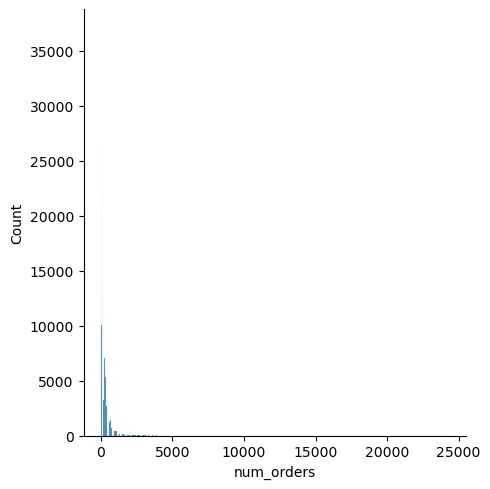

In [11]:
sns.displot(x='num_orders',data=combined)
plt.show()

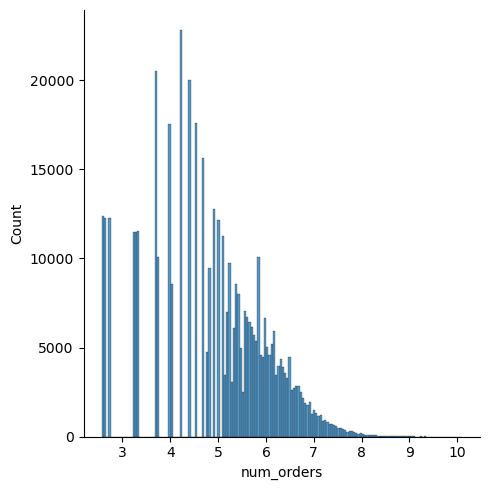

In [12]:
sns.displot(np.log(combined.num_orders))
plt.show()

In [13]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [14]:
combined['log_target'] = np.log(combined.num_orders)

In [15]:
# Base Price 

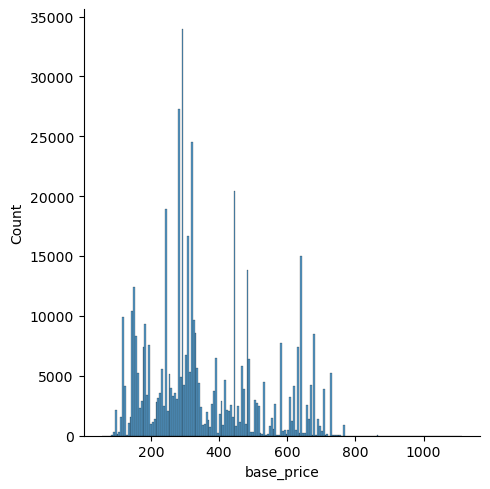

In [16]:
sns.displot(combined.base_price)
plt.show()

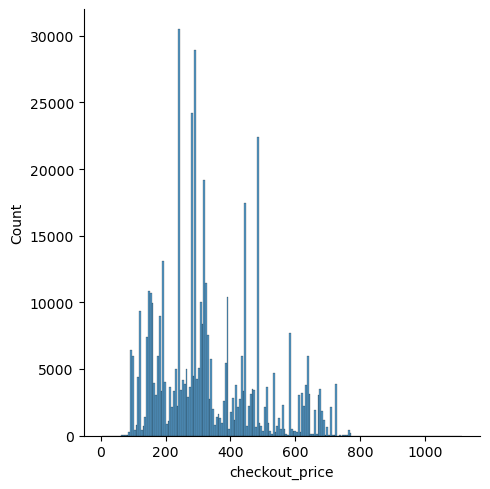

In [17]:
sns.displot(combined.checkout_price)
plt.show()

In [18]:
combined.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,log_target
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,5.176150
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,5.598422
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai,5.241747
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian,3.988984
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian,3.688879
5,1270037,1,55,1248,251.23,252.23,0,0,28.0,647,56,TYPE_C,2.0,Beverages,Indian,3.332205
6,1191377,1,55,1778,183.36,184.36,0,0,190.0,647,56,TYPE_C,2.0,Beverages,Italian,5.247024
7,1499955,1,55,1062,182.36,183.36,0,0,391.0,647,56,TYPE_C,2.0,Beverages,Italian,5.968708
8,1025244,1,55,2707,193.06,192.06,0,0,472.0,647,56,TYPE_C,2.0,Beverages,Italian,6.156979
9,1054194,1,55,1207,325.92,384.18,0,1,676.0,647,56,TYPE_C,2.0,Beverages,Continental,6.516193


In [19]:
# Treatment of Prices

In [20]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489121 entries, 0 to 489120
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     489121 non-null  int64  
 1   week                   489121 non-null  int64  
 2   center_id              489121 non-null  int64  
 3   meal_id                489121 non-null  int64  
 4   checkout_price         489121 non-null  float64
 5   base_price             489121 non-null  float64
 6   emailer_for_promotion  489121 non-null  int64  
 7   homepage_featured      489121 non-null  int64  
 8   num_orders             456548 non-null  float64
 9   city_code              489121 non-null  int64  
 10  region_code            489121 non-null  int64  
 11  center_type            489121 non-null  object 
 12  op_area                489121 non-null  float64
 13  category               489121 non-null  object 
 14  cuisine                489121 non-nu

In [21]:
# Treatment of Prices

In [22]:
combined['price_diff'] = combined.base_price - combined.checkout_price

In [23]:
combined['price_diff'].describe()

count    489121.000000
mean         21.432982
std          47.976701
min        -185.300000
25%          -1.000000
50%           0.030000
75%           5.850000
max         820.590000
Name: price_diff, dtype: float64

In [24]:
def price(x):
    if x < 0:
        return('Discount')
    elif x<10:
        return('Taxes')
    else:
        return('Addnl_Chgs')

In [25]:
combined['price_cat'] = combined.price_diff.apply(price)

In [26]:
combined.price_cat.value_counts(normalize=True)

price_cat
Taxes         0.495810
Discount      0.255638
Addnl_Chgs    0.248552
Name: proportion, dtype: float64

In [27]:
# To check the price cat vs target variable anova will be applied remember this point 

In [28]:
combined.loc[:,['price_diff','num_orders']].corr()

,price_diff,num_orders
price_diff,1.00000,0.15295
num_orders,0.15295,1.00000


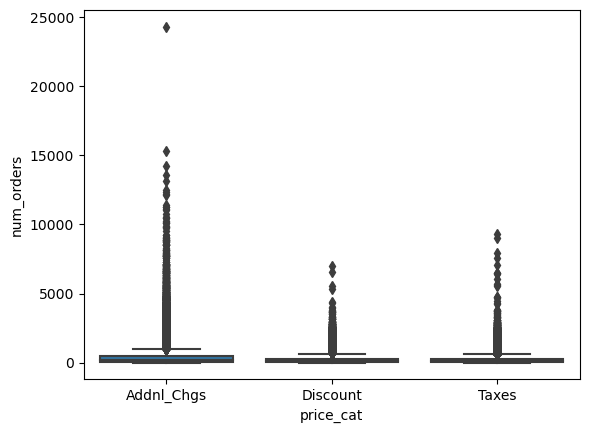

In [29]:
sns.boxplot(x='price_cat',y='num_orders',data=combined)
plt.show()

In [30]:
# Social Medial 

combined['marketing'] = combined.emailer_for_promotion+\
combined.homepage_featured

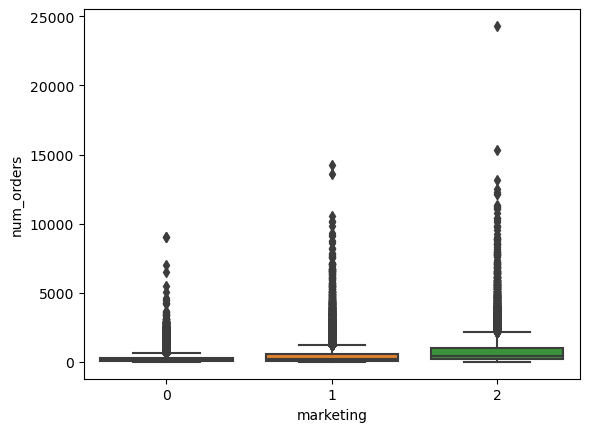

In [31]:
sns.boxplot(x='marketing',y='num_orders',data=combined)
plt.show()

In [32]:
# cusine

<Axes: xlabel='cuisine'>

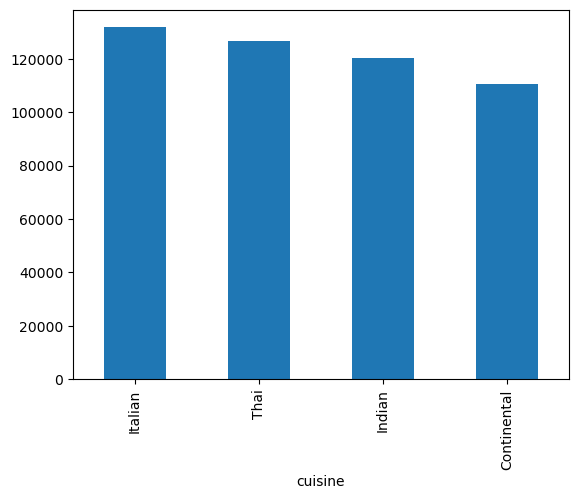

In [33]:
combined.cuisine.value_counts().plot(kind='bar')

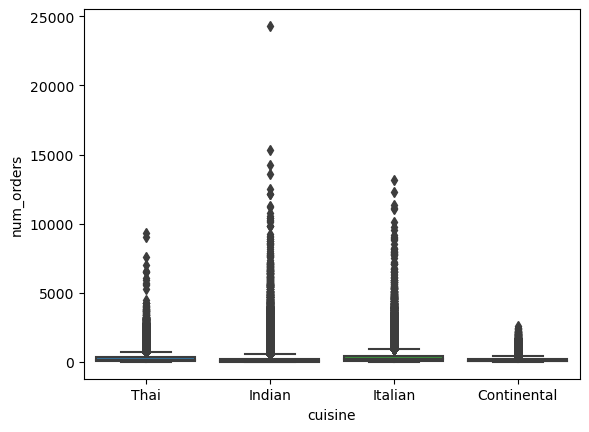

In [34]:
sns.boxplot(x='cuisine',y='num_orders',data=combined)
plt.show()

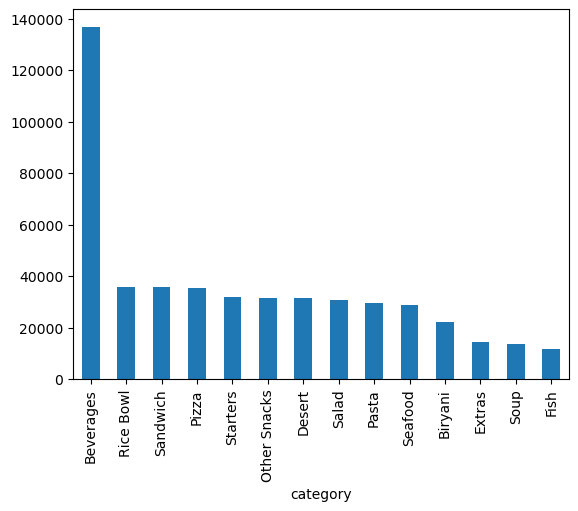

In [35]:
#Cusine
combined.category.value_counts().plot(kind='bar')
plt.show()
# Top 5: Beverages, Ricebowl, Sandwich, Pizza, Starters

In [36]:
combined.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,log_target,price_diff,price_cat,marketing
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,5.176150,15.46,Addnl_Chgs,0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,5.598422,-1.00,Discount,0


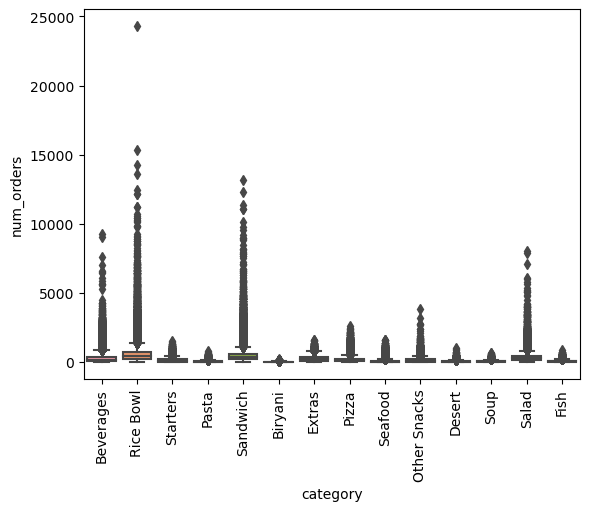

In [37]:
sns.boxplot(x='category',y='num_orders',data=combined)
plt.xticks(rotation=90)
plt.show()
# Salad, Beverage, RiceBowl, Sandwich, Other Snackes

In [38]:
combined.head(2)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,log_target,price_diff,price_cat,marketing
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,5.176150,15.46,Addnl_Chgs,0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,5.598422,-1.00,Discount,0


In [39]:
combined.op_area.describe()

count    489121.000000
mean          4.083865
std           1.092163
min           0.900000
25%           3.600000
50%           4.000000
75%           4.500000
max           7.000000
Name: op_area, dtype: float64

In [40]:
import scipy.stats as stats
import math
math.pi

3.141592653589793

In [41]:
def radii(x):
    return(np.sqrt(x/math.pi))
combined['radii'] = combined.op_area.apply(radii)   

In [42]:
combined.loc[:,['radii','num_orders']].corr()

,radii,num_orders
radii,1.00000,0.17253
num_orders,0.17253,1.00000


In [43]:
combined.head(20)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,log_target,price_diff,price_cat,marketing,radii
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,5.176150,15.46,Addnl_Chgs,0,0.797885
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,5.598422,-1.00,Discount,0,0.797885
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai,5.241747,1.00,Taxes,0,0.797885
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian,3.988984,98.03,Addnl_Chgs,0,0.797885
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian,3.688879,-1.00,Discount,0,0.797885
5,1270037,1,55,1248,251.23,252.23,0,0,28.0,647,56,TYPE_C,2.0,Beverages,Indian,3.332205,1.00,Taxes,0,0.797885
6,1191377,1,55,1778,183.36,184.36,0,0,190.0,647,56,TYPE_C,2.0,Beverages,Italian,5.247024,1.00,Taxes,0,0.797885
7,1499955,1,55,1062,182.36,183.36,0,0,391.0,647,56,TYPE_C,2.0,Beverages,Italian,5.968708,1.00,Taxes,0,0.797885
8,1025244,1,55,2707,193.06,192.06,0,0,472.0,647,56,TYPE_C,2.0,Beverages,Italian,6.156979,-1.00,Discount,0,0.797885
9,1054194,1,55,1207,325.92,384.18,0,1,676.0,647,56,TYPE_C,2.0,Beverages,Continental,6.516193,58.26,Addnl_Chgs,1,0.797885


In [44]:
# Centre Type, Region code, and city code

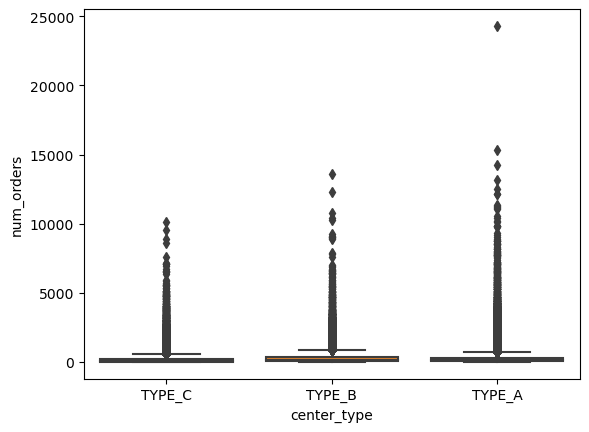

In [45]:
sns.boxplot(x='center_type',y='num_orders',data = combined)
plt.show()

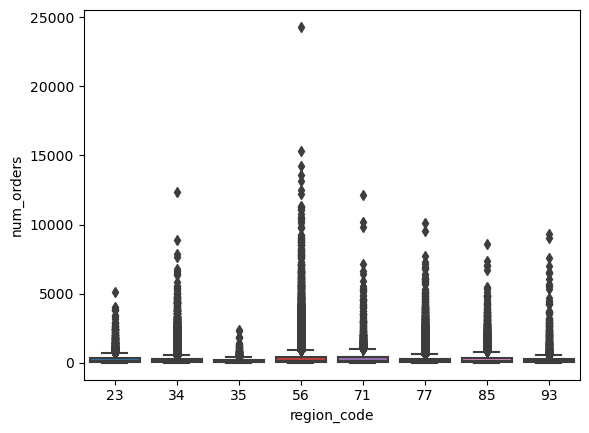

In [46]:
sns.boxplot(x='region_code',y='num_orders',data = combined)
plt.show()

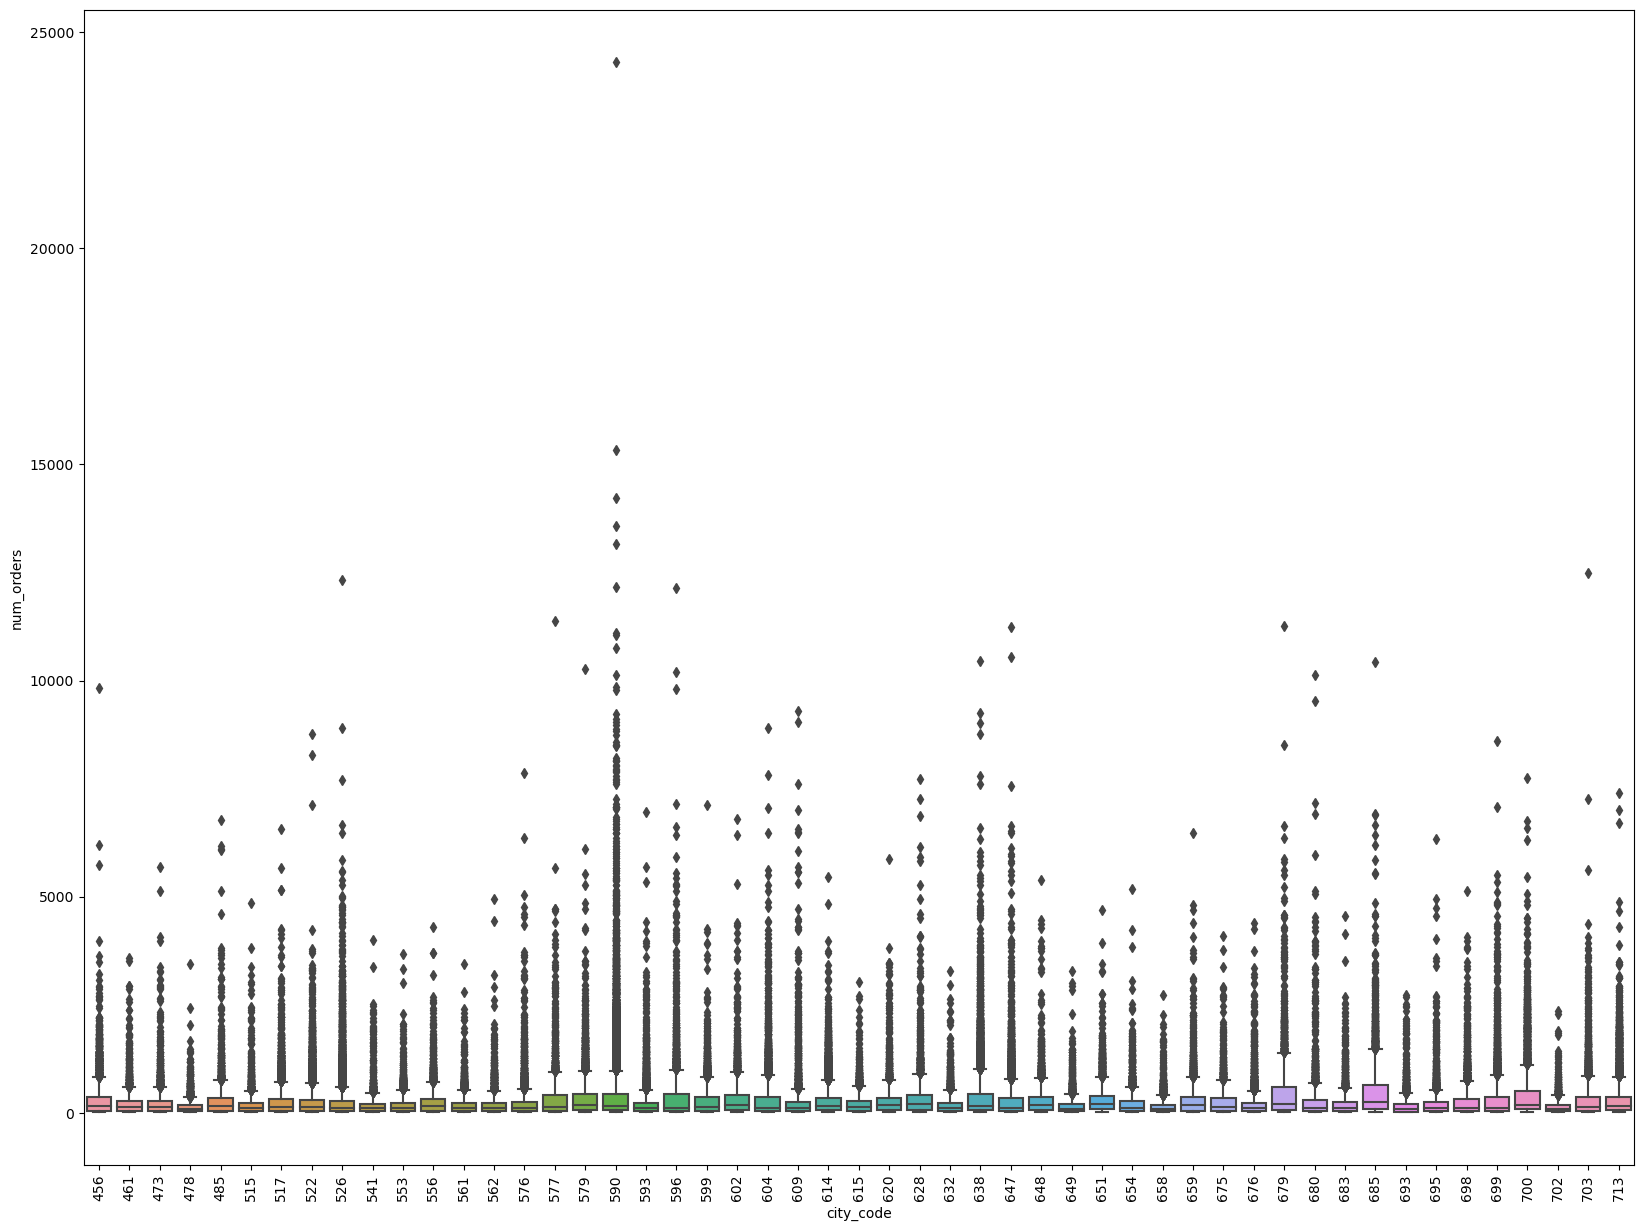

In [47]:
plt.figure(figsize=(20,15))
sns.boxplot(x='city_code',y='num_orders',data = combined)
plt.xticks(rotation = 90)
plt.show()

In [48]:
combined.city_code.nunique()

51

In [49]:
combined.city_code.value_counts()[:5].index

Index([590, 526, 638, 522, 517], dtype='int64', name='city_code')

In [50]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,log_target,price_diff,price_cat,marketing,radii
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,TYPE_C,2.0,Beverages,Thai,5.176150,15.46,Addnl_Chgs,0,0.797885
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,TYPE_C,2.0,Beverages,Thai,5.598422,-1.00,Discount,0,0.797885
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,TYPE_C,2.0,Beverages,Thai,5.241747,1.00,Taxes,0,0.797885
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,TYPE_C,2.0,Beverages,Indian,3.988984,98.03,Addnl_Chgs,0,0.797885
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,TYPE_C,2.0,Beverages,Indian,3.688879,-1.00,Discount,0,0.797885


In [51]:
combined.week.describe()

count    489121.000000
mean         79.810613
std          44.343325
min           1.000000
25%          42.000000
50%          81.000000
75%         118.000000
max         155.000000
Name: week, dtype: float64

In [52]:
155/52

2.980769230769231

In [53]:
def year(x):
    if x<=52:
        return('Year1')
    elif x<=104:
        return('Year2')
    else:
        return('Year3')

In [54]:
combined['Year'] = combined.week.apply(year)

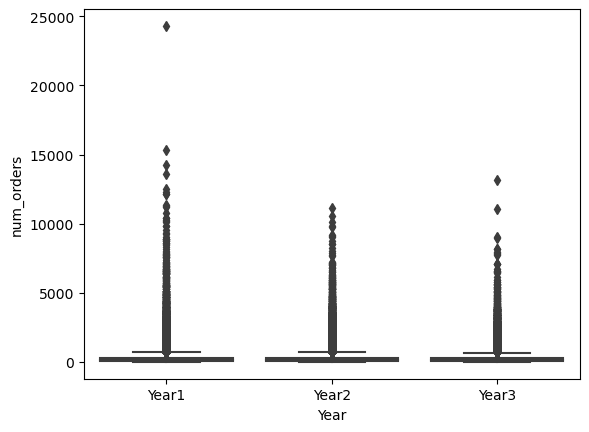

In [55]:
sns.boxplot(x='Year',y='num_orders',data=combined)
plt.show()

In [56]:
np.max(combined.week)

155

In [57]:
# max_week = 115

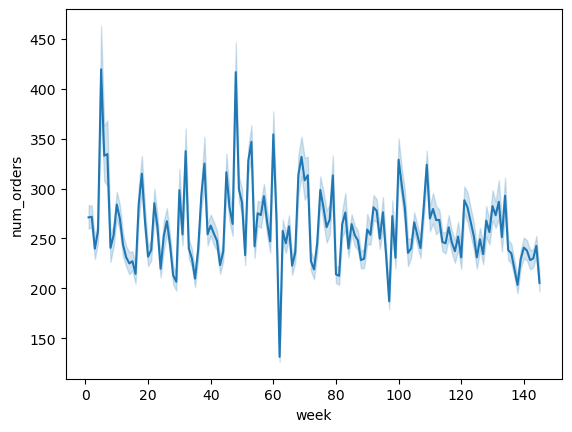

In [58]:
sns.lineplot(x='week',y='num_orders',data=combined)
plt.show()

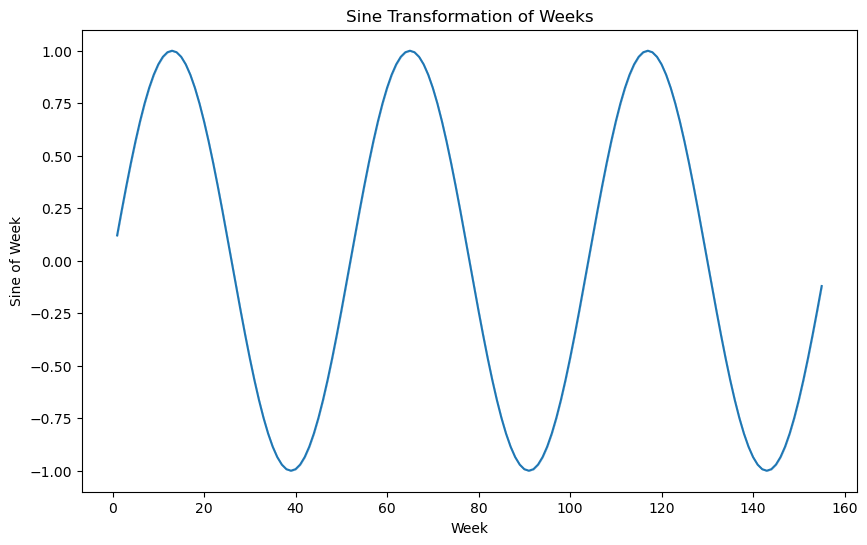

In [59]:
combined['sin_week'] = np.sin(2 * np.pi * combined['week'] / 52)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined, x='week', y='sin_week')
plt.title('Sine Transformation of Weeks')
plt.xlabel('Week')
plt.ylabel('Sine of Week')
plt.show()

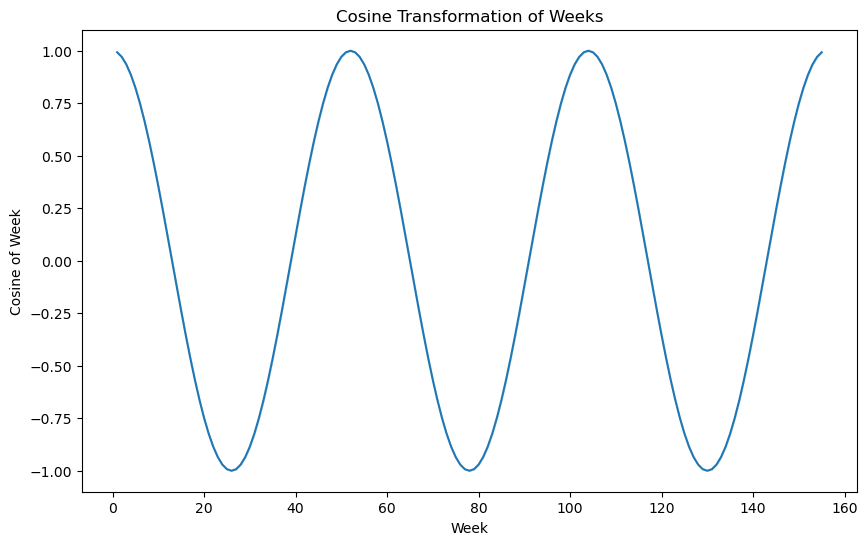

In [60]:
combined['cos_week'] = np.cos(2 * np.pi * combined['week'] / 52)
plt.figure(figsize=(10, 6))
sns.lineplot(data=combined, x='week', y='cos_week')
plt.title('Cosine Transformation of Weeks')
plt.xlabel('Week')
plt.ylabel('Cosine of Week')
plt.show()

In [61]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,category,cuisine,log_target,price_diff,price_cat,marketing,radii,Year,sin_week,cos_week
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,...,Beverages,Thai,5.176150,15.46,Addnl_Chgs,0,0.797885,Year1,0.120537,0.992709
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,...,Beverages,Thai,5.598422,-1.00,Discount,0,0.797885,Year1,0.120537,0.992709
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,...,Beverages,Thai,5.241747,1.00,Taxes,0,0.797885,Year1,0.120537,0.992709
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,...,Beverages,Indian,3.988984,98.03,Addnl_Chgs,0,0.797885,Year1,0.120537,0.992709
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,...,Beverages,Indian,3.688879,-1.00,Discount,0,0.797885,Year1,0.120537,0.992709


In [62]:
combined['id'].nunique()

489121

In [63]:
# Dropping 4 features
combined.drop(['id','week','emailer_for_promotion','homepage_featured'],axis=1,inplace=True)

In [64]:
combined.dtypes

center_id           int64
meal_id             int64
checkout_price    float64
base_price        float64
num_orders        float64
city_code           int64
region_code         int64
center_type        object
op_area           float64
category           object
cuisine            object
log_target        float64
price_diff        float64
price_cat          object
marketing           int64
radii             float64
Year               object
sin_week          float64
cos_week          float64
dtype: object

In [65]:
combined.shape

(489121, 19)

In [66]:
combined.columns

Index(['center_id', 'meal_id', 'checkout_price', 'base_price', 'num_orders',
       'city_code', 'region_code', 'center_type', 'op_area', 'category',
       'cuisine', 'log_target', 'price_diff', 'price_cat', 'marketing',
       'radii', 'Year', 'sin_week', 'cos_week'],
      dtype='object')

### Feature Engineering 
* Centre Id Wise num_orders
* meal_id  Wise num_orders
* city_code  Wise num_orders
* region_code  Wise num_orders
* Centre Type  Wise num_orders
* Category  Wise num_orders

In [67]:
# centre wise
combined['magic1']=combined.groupby('center_id')['num_orders'].transform('min')
combined['magic2']=combined.groupby('center_id')['num_orders'].transform('mean')
combined['magic3']=combined.groupby('center_id')['num_orders'].transform('median')
combined['magic4']=combined.groupby('center_id')['num_orders'].transform('std')
combined['magic5']=combined.groupby('center_id')['num_orders'].transform('max')

In [68]:
combined['magic6']=combined.groupby('meal_id')['num_orders'].transform('min')
combined['magic7']=combined.groupby('meal_id')['num_orders'].transform('mean')
combined['magic8']=combined.groupby('meal_id')['num_orders'].transform('median')
combined['magic9']=combined.groupby('meal_id')['num_orders'].transform('std')
combined['magic10']=combined.groupby('meal_id')['num_orders'].transform('max')

In [69]:
combined['magic11']=combined.groupby('city_code')['num_orders'].transform('min')
combined['magic12']=combined.groupby('city_code')['num_orders'].transform('mean')
combined['magic13']=combined.groupby('city_code')['num_orders'].transform('median')
combined['magic14']=combined.groupby('city_code')['num_orders'].transform('std')
combined['magic15']=combined.groupby('city_code')['num_orders'].transform('max')

In [70]:
combined['magic16']=combined.groupby('region_code')['num_orders'].transform('min')
combined['magic17']=combined.groupby('region_code')['num_orders'].transform('mean')
combined['magic18']=combined.groupby('region_code')['num_orders'].transform('median')
combined['magic19']=combined.groupby('region_code')['num_orders'].transform('std')
combined['magic20']=combined.groupby('region_code')['num_orders'].transform('max')

In [71]:
combined['magic21']=combined.groupby('category')['num_orders'].transform('min')
combined['magic22']=combined.groupby('category')['num_orders'].transform('mean')
combined['magic23']=combined.groupby('category')['num_orders'].transform('median')
combined['magic24']=combined.groupby('category')['num_orders'].transform('std')
combined['magic25']=combined.groupby('category')['num_orders'].transform('max')

In [72]:
combined.head()

,center_id,meal_id,checkout_price,base_price,num_orders,city_code,region_code,center_type,op_area,category,...,magic16,magic17,magic18,magic19,magic20,magic21,magic22,magic23,magic24,magic25
0,55,1885,136.83,152.29,177.0,647,56,TYPE_C,2.0,Beverages,...,13.0,316.481849,161.0,477.08328,24299.0,13.0,316.526116,189.0,375.280914,9303.0
1,55,1993,136.83,135.83,270.0,647,56,TYPE_C,2.0,Beverages,...,13.0,316.481849,161.0,477.08328,24299.0,13.0,316.526116,189.0,375.280914,9303.0
2,55,2539,134.86,135.86,189.0,647,56,TYPE_C,2.0,Beverages,...,13.0,316.481849,161.0,477.08328,24299.0,13.0,316.526116,189.0,375.280914,9303.0
3,55,2139,339.50,437.53,54.0,647,56,TYPE_C,2.0,Beverages,...,13.0,316.481849,161.0,477.08328,24299.0,13.0,316.526116,189.0,375.280914,9303.0
4,55,2631,243.50,242.50,40.0,647,56,TYPE_C,2.0,Beverages,...,13.0,316.481849,161.0,477.08328,24299.0,13.0,316.526116,189.0,375.280914,9303.0


In [73]:
combined.isnull().sum()

center_id             0
meal_id               0
checkout_price        0
base_price            0
num_orders        32573
city_code             0
region_code           0
center_type           0
op_area               0
category              0
cuisine               0
log_target        32573
price_diff            0
price_cat             0
marketing             0
radii                 0
Year                  0
sin_week              0
cos_week              0
magic1                0
magic2                0
magic3                0
magic4                0
magic5                0
magic6                0
magic7                0
magic8                0
magic9                0
magic10               0
magic11               0
magic12               0
magic13               0
magic14               0
magic15               0
magic16               0
magic17               0
magic18               0
magic19               0
magic20               0
magic21               0
magic22               0
magic23         

* Category Wise Check out price 
* centreid Wise Check out price 
* meal_id Wise Check out price 
* Citycode Wise Check out price 
* regioncode Wise Check out price 

In [74]:
# Category Wise Check out price 
combined['magic26']=combined.groupby('category')['checkout_price'].transform('min')
combined['magic27']=combined.groupby('category')['checkout_price'].transform('mean')
combined['magic28']=combined.groupby('category')['checkout_price'].transform('median')
combined['magic29']=combined.groupby('category')['checkout_price'].transform('std')
combined['magic30']=combined.groupby('category')['checkout_price'].transform('max')

In [75]:
#centreid Wise Check out price
combined['magic31']=combined.groupby('center_id')['checkout_price'].transform('min')
combined['magic32']=combined.groupby('center_id')['checkout_price'].transform('mean')
combined['magic33']=combined.groupby('center_id')['checkout_price'].transform('median')
combined['magic34']=combined.groupby('center_id')['checkout_price'].transform('std')
combined['magic35']=combined.groupby('center_id')['checkout_price'].transform('max')

In [76]:
# meal_id Wise Check out price
combined['magic36']=combined.groupby('meal_id')['checkout_price'].transform('min')
combined['magic37']=combined.groupby('meal_id')['checkout_price'].transform('mean')
combined['magic38']=combined.groupby('meal_id')['checkout_price'].transform('median')
combined['magic39']=combined.groupby('meal_id')['checkout_price'].transform('std')
combined['magic40']=combined.groupby('meal_id')['checkout_price'].transform('max')

In [77]:
#regionCode Wise Check out price
combined['magic41']=combined.groupby('region_code')['checkout_price'].transform('min')
combined['magic42']=combined.groupby('region_code')['checkout_price'].transform('mean')
combined['magic43']=combined.groupby('region_code')['checkout_price'].transform('median')
combined['magic44']=combined.groupby('region_code')['checkout_price'].transform('std')
combined['magic45']=combined.groupby('region_code')['checkout_price'].transform('max')

In [78]:
#CityCode Wise Check out price
combined['magic46']=combined.groupby('city_code')['checkout_price'].transform('min')
combined['magic47']=combined.groupby('city_code')['checkout_price'].transform('mean')
combined['magic48']=combined.groupby('city_code')['checkout_price'].transform('median')
combined['magic49']=combined.groupby('city_code')['checkout_price'].transform('std')
combined['magic50']=combined.groupby('city_code')['checkout_price'].transform('max')

In [79]:
import scipy.stats as stats
from scipy.stats import ttest_ind

In [80]:
combined.shape

(489121, 69)

In [81]:
# Split the Data into the Train and Test 

In [82]:
newtrain = combined.loc[0:train.shape[0]-1,:]
newtest = combined.loc[train.shape[0]:,:]
train.shape,test.shape,newtrain.shape,newtest.shape

((456548, 9), (32573, 8), (456548, 69), (32573, 69))

In [83]:
newtest.drop('num_orders',axis=1,inplace=True)

In [84]:
train.shape,test.shape,newtrain.shape,newtest.shape

((456548, 9), (32573, 8), (456548, 69), (32573, 68))

In [85]:
# Statistical Analysis 

In [86]:
import scipy.stats as stats
from scipy.stats import ttest_ind

In [87]:
pd.set_option('display.max_columns',100)

In [88]:
newtrain.select_dtypes(include=np.number).columns

Index(['center_id', 'meal_id', 'checkout_price', 'base_price', 'num_orders',
       'city_code', 'region_code', 'op_area', 'log_target', 'price_diff',
       'marketing', 'radii', 'sin_week', 'cos_week', 'magic1', 'magic2',
       'magic3', 'magic4', 'magic5', 'magic6', 'magic7', 'magic8', 'magic9',
       'magic10', 'magic11', 'magic12', 'magic13', 'magic14', 'magic15',
       'magic16', 'magic17', 'magic18', 'magic19', 'magic20', 'magic21',
       'magic22', 'magic23', 'magic24', 'magic25', 'magic26', 'magic27',
       'magic28', 'magic29', 'magic30', 'magic31', 'magic32', 'magic33',
       'magic34', 'magic35', 'magic36', 'magic37', 'magic38', 'magic39',
       'magic40', 'magic41', 'magic42', 'magic43', 'magic44', 'magic45',
       'magic46', 'magic47', 'magic48', 'magic49', 'magic50'],
      dtype='object')

In [89]:
nums = ['magic1', 'magic2',
       'magic3', 'magic4', 'magic5', 'magic6', 'magic7', 'magic8', 'magic9',
       'magic10', 'magic11', 'magic12', 'magic13', 'magic14', 'magic15',
       'magic16', 'magic17', 'magic18', 'magic19', 'magic20', 'magic21',
       'magic22', 'magic23', 'magic24', 'magic25', 'magic26', 'magic27',
       'magic28', 'magic29', 'magic30', 'magic31', 'magic32', 'magic33',
       'magic34', 'magic35', 'magic36', 'magic37', 'magic38', 'magic39',
       'magic40', 'magic41', 'magic42', 'magic43', 'magic44', 'magic45',
       'magic46', 'magic47', 'magic48', 'magic49', 'magic50']

In [90]:
# H0: Predictor and target are Independent 
# Ha: Ho is False

In [91]:
# pvalue=[]
# for i in nums:
#     teststats,pval = stats.ttest_ind(newtrain.loc[:,i],
#                                      newtrain.num_orders)
#     pvalue.append({i:pval})

In [92]:
pvalue=[]
for i in nums:
    teststats,pval = stats.ttest_ind(newtrain.loc[:,i],
                                     newtrain.num_orders)
    pvalue.append(pval)

In [93]:
pvalue

[0.0,
 0.999999999999925,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 9.372859156502044e-83,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9999999999999233,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9999999999999288,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [94]:
pvals = pd.DataFrame(pvalue,index=nums,columns=['PValue'])
significant = pvals.loc[pvals.PValue<0.05].index

In [95]:
significant

Index(['magic1', 'magic3', 'magic4', 'magic5', 'magic6', 'magic8', 'magic9',
       'magic10', 'magic11', 'magic13', 'magic14', 'magic15', 'magic16',
       'magic18', 'magic19', 'magic20', 'magic21', 'magic23', 'magic24',
       'magic25', 'magic26', 'magic27', 'magic28', 'magic29', 'magic30',
       'magic31', 'magic32', 'magic33', 'magic34', 'magic35', 'magic36',
       'magic37', 'magic38', 'magic39', 'magic40', 'magic41', 'magic42',
       'magic43', 'magic44', 'magic45', 'magic46', 'magic47', 'magic48',
       'magic49', 'magic50'],
      dtype='object')

In [96]:
# Price_Diff vs target 
# H0: Price Diff has no relation with Num_Orders
# Ha: No of Orders depends on price Diff

teststats,pval = stats.ttest_ind(newtrain.loc[:,'price_diff'],
                                newtrain.num_orders)

In [97]:
teststats,pval

(-406.4703738608052, 0.0)

In [98]:
pvals = pd.DataFrame(pvalue,index=nums,columns=['PValue'])
insignificant = pvals.loc[pvals.PValue>0.05].index

In [99]:
insignificant

Index(['magic2', 'magic7', 'magic12', 'magic17', 'magic22'], dtype='object')

In [100]:
# Radii and Op Area 
# Ho: Op Area has no relation with the Num_Orders
# Ha: No of Orders depend on OpArea

teststats,pval = stats.ttest_ind(newtrain.loc[:,'op_area'],
                                newtrain.num_orders)
teststats,pval

(-439.9423098622263, 0.0)

In [101]:
# Ho: Radii has no relation with the Num_Orders
# Ha: No of Orders depend on Radii
teststats,pval = stats.ttest_ind(newtrain.loc[:,'radii'],
                                newtrain.num_orders)
teststats,pval

(-444.98491992280447, 0.0)

In [102]:
from scipy.stats import *

In [103]:
def return_splits(ddf, feature_name, target_name):
    return [ddf[ddf[feature_name] == i][target_name] for i in ddf[feature_name].unique()]

def give_stats_analysis(df, target_column_name):
    ddf = df.copy()
    ddf = ddf.dropna()

    features = []
    tests = []
    stats = []
    pvals = []
    count = 0

    target = ddf[target_column_name]
    for i in ddf.columns:
        features.append(i)
        feature = ddf[i]
        
        if (feature.dtype == "O" and (target.dtype == "float" or target.dtype == "int")) or (target.dtype == "O" and (feature.dtype == "float" or feature.dtype == "int")):
            stat, pval, *_ = kruskal(*return_splits(ddf, feature.name, target.name))
            tests.append("Kruskal-Wallis")
            stats.append(stat)
            pvals.append(pval)
            
        
        elif (feature.dtype == "float" or feature.dtype == "int") and (target.dtype == "float" or target.dtype == "int"):
            stat, pval, *_ = ttest_ind(feature, target)
            tests.append("TTest")
            stats.append(stat)
            pvals.append(pval)

        elif feature.dtype == "O" and target.dtype == "O":
            stat, pval, *_ = chi2_contingency(pd.crosstab(feature, target))
            tests.append("Chi-Square")
            stats.append(stat)
            pvals.append(pval)
        
        else:
            tests.append(np.nan)
            stats.append(np.nan)
            pvals.append(np.nan)

        print(f"{feature.name} ■■■ {target_column_name}".ljust(50, "-")+"✅")
    
    return pd.DataFrame({
        "Feature" : features,
        "Target" : [target_column_name]*ddf.shape[1],
        "Statistic Test" : tests,
        "Test Statistic" : stats,
        "P-Value" : pvals
    }).sort_values(by="P-Value")

In [104]:
give_stats_analysis(newtrain, 'num_orders')

center_id ■■■ num_orders--------------------------✅
meal_id ■■■ num_orders----------------------------✅
checkout_price ■■■ num_orders---------------------✅
base_price ■■■ num_orders-------------------------✅
num_orders ■■■ num_orders-------------------------✅
city_code ■■■ num_orders--------------------------✅
region_code ■■■ num_orders------------------------✅
center_type ■■■ num_orders------------------------✅
op_area ■■■ num_orders----------------------------✅
category ■■■ num_orders---------------------------✅
cuisine ■■■ num_orders----------------------------✅
log_target ■■■ num_orders-------------------------✅
price_diff ■■■ num_orders-------------------------✅
price_cat ■■■ num_orders--------------------------✅
marketing ■■■ num_orders--------------------------✅
radii ■■■ num_orders------------------------------✅
Year ■■■ num_orders-------------------------------✅
sin_week ■■■ num_orders---------------------------✅
cos_week ■■■ num_orders---------------------------✅
magic1 ■■■ n

,Feature,Target,Statistic Test,Test Statistic,P-Value
0,center_id,num_orders,TTest,-3.047433e+02,0.0
36,magic18,num_orders,TTest,-2.037303e+02,0.0
37,magic19,num_orders,TTest,1.973606e+02,0.0
38,magic20,num_orders,TTest,1.577697e+03,0.0
39,magic21,num_orders,TTest,-4.247272e+02,0.0
...,...,...,...,...,...
20,magic2,num_orders,TTest,-9.405180e-14,1.0
40,magic22,num_orders,TTest,8.920252e-14,1.0
25,magic7,num_orders,TTest,0.000000e+00,1.0
4,num_orders,num_orders,TTest,0.000000e+00,1.0


In [105]:
# Cat Vs Num 
newtrain.select_dtypes(exclude = np.number).columns

Index(['center_type', 'category', 'cuisine', 'price_cat', 'Year'], dtype='object')

In [106]:
#ANOVA

#Ho: predictor and target are independent
#Ha: Ho is false

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model = sfa.ols('num_orders~center_type+category+cuisine+price_cat+Year', data = newtrain).fit()

print(anova_lm(model))

                   df        sum_sq       mean_sq             F        PR(>F)
center_type       2.0  6.090329e+08  3.045165e+08   2802.233558  0.000000e+00
category         13.0  1.343108e+10  1.033160e+09   9507.383881  0.000000e+00
cuisine           3.0  4.510531e+09  1.503510e+09  13835.663300  0.000000e+00
price_cat         2.0  3.397928e+09  1.698964e+09  15634.275816  0.000000e+00
Year              2.0  7.186426e+06  3.593213e+06     33.065609  4.373492e-15
Residual     456525.0  4.961021e+10  1.086692e+05           NaN           NaN


In [107]:
# Drop the insignificant features from the Train and Test

In [108]:
newtrain.drop(insignificant,axis=1,inplace=True)
newtest.drop(insignificant,axis=1,inplace=True)

In [109]:
newtrain.drop(['center_id','meal_id','city_code','region_code','category'],axis=1,inplace=True)
newtest.drop(['center_id','meal_id','city_code','region_code','category'],axis=1,inplace=True)

In [110]:
newtrain.columns

Index(['checkout_price', 'base_price', 'num_orders', 'center_type', 'op_area',
       'cuisine', 'log_target', 'price_diff', 'price_cat', 'marketing',
       'radii', 'Year', 'sin_week', 'cos_week', 'magic1', 'magic3', 'magic4',
       'magic5', 'magic6', 'magic8', 'magic9', 'magic10', 'magic11', 'magic13',
       'magic14', 'magic15', 'magic16', 'magic18', 'magic19', 'magic20',
       'magic21', 'magic23', 'magic24', 'magic25', 'magic26', 'magic27',
       'magic28', 'magic29', 'magic30', 'magic31', 'magic32', 'magic33',
       'magic34', 'magic35', 'magic36', 'magic37', 'magic38', 'magic39',
       'magic40', 'magic41', 'magic42', 'magic43', 'magic44', 'magic45',
       'magic46', 'magic47', 'magic48', 'magic49', 'magic50'],
      dtype='object')

#Modlling 

*⁠  ⁠split the data in x and y

*  ⁠KFOLD CV

*  ⁠prediction

*⁠  ⁠submission

In [111]:
#Split the Data into X and y
X = newtrain.drop(["num_orders","log_target","Year"],axis=1)
y = newtrain["num_orders"]
logy = newtrain["log_target"]

dummyx = pd.get_dummies(X,drop_first=True,dtype=int)
newtest.drop("log_target",axis=1,inplace=True)

In [112]:
newtest.drop('Year',axis=1,inplace=True)
dummytest = pd.get_dummies(newtest,drop_first=True)

In [113]:
dummyx.shape, newtest.shape

((456548, 60), (32573, 56))

In [114]:
# KFold Model 
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import root_mean_squared_log_error,root_mean_squared_error
kfold = KFold(n_splits=5,shuffle=True)

lr = LinearRegression()
rf= RandomForestRegressor()
gbm = GradientBoostingRegressor()

In [115]:
# pred = []
# for train_index, test_index, in kfold.split(dummyx,y):
#     xtrain = dummyx.iloc[train_index,:]
#     xtest = dummyx.iloc[train_index,:]
#     ytrain = y.iloc[train_index]
#     ytest = y.iloc[test_index]
# # Modelling and Predection 
# pred_lr = lr.fit(xtrain,ytrain).predict(xtest)
# #Cost Function
# cost = root_mean_squared_error(ytest,pred_lr)
# print(cost)

In [116]:
pred = []
for train_index,test_index in kfold.split(dummyx,y):
    xtrain  = dummyx.iloc[train_index,:]
    xtest   = dummyx.iloc[test_index,:]
    ytrain  = y.iloc[train_index]
    ytest   = y.iloc[test_index]
    #Modeling and Prediction
    pred_lr = lr.fit(xtrain,ytrain).predict(xtest)
    #Cost Function
    cost = root_mean_squared_error(ytest,pred_lr)
    print(cost)
    #Final Prediciton
    pred.append(lr.predict(dummytest))

294.9930285628043
294.9770366680312
270.989505092584
281.9522180882916
281.2155561147337


In [117]:
print(pred)

[array([554.4963459 , 416.46175942, 134.66348022, ..., 323.66093109,
       288.1442785 , 304.61015385]), array([558.06424639, 420.89127888, 135.25486975, ..., 329.96114882,
       292.95648674, 302.26984875]), array([555.43520436, 416.4463164 , 135.22933135, ..., 328.40435746,
       291.60591362, 305.0031835 ]), array([556.30938109, 418.44483196, 133.31075238, ..., 328.15320167,
       291.45834472, 305.14457982]), array([556.07756307, 418.43288315, 136.28456621, ..., 325.3164144 ,
       289.88830973, 304.17300924])]


In [118]:
#final prediction

In [119]:
submission = pd.DataFrame(pred).T.mean(axis=1)

In [120]:
# Sample
sample = pd.read_csv('/Users/pradeepujwalkumarkammadanam/Desktop/GL_Course/GL_ML/Day_5/sample_submission_hSlSoT6 (1).csv')

In [121]:
# Save the Predictions 
sample['num_orders'] = np.abs(submission)
# Export it into csv 
sample.to_csv('LRModel.csv',index=False)

In [122]:
# Target Variable is Logy
pred=[]
for train_index, test_index in kfold.split(dummyx, y):
    xtrain = dummyx.iloc[train_index,:]
    xtest = dummyx.iloc[test_index,:]
    ytrain = logy.iloc[train_index]
    ytest = logy.iloc[test_index]
# Model and Prediction
    pred_lr = lr.fit(xtrain,ytrain).predict(xtest)
    cost = root_mean_squared_error(ytest,pred_lr)
    print(cost)
#Final Prediction 
    pred.append(lr.predict(dummytest))

0.6618528035797898
0.6602969185566058
0.6570313962180274
0.6590060956834102
0.6610831493588851


In [123]:
print(pred)

[array([5.77539973, 5.41908183, 4.54502689, ..., 5.75688756, 5.60868754,
       5.37998463]), array([5.77151039, 5.42094708, 4.54325758, ..., 5.76074698, 5.60940469,
       5.37498992]), array([5.76832871, 5.41483825, 4.53989512, ..., 5.75948497, 5.60879854,
       5.37441458]), array([5.77732995, 5.42134448, 4.54259678, ..., 5.7536701 , 5.60592226,
       5.37474116]), array([5.7728738 , 5.42162094, 4.53950501, ..., 5.75400205, 5.60583367,
       5.3776918 ])]


In [124]:
submission = pd.DataFrame(np.exp(pred)).T.mean(axis=1)

sample['num_orders'] = np.abs(submission)

# Export it to csv 
sample.to_csv('LRLOGModel.csv',index=False) 

In [127]:
#Target Variable is Logy
pred=[]
for train_index, test_index in kfold.split(dummyx, y):
     xtrain = dummyx.iloc[train_index,:]
     xtest = dummyx.iloc[test_index,:]
     ytrain = logy.iloc[train_index]
     ytest = logy.iloc[test_index]
# # Model and Prediction
     pred_lr = rf.fit(xtrain,ytrain).predict(xtest)
     cost = root_mean_squared_error(ytest,pred_lr)
     print(cost)
# #Final Prediction 
     pred.append(rf.predict(dummytest)) # 

0.4949776178602125
0.49800313820307596
0.49583799944089746
0.49508246169107356
0.49774129414612306


In [128]:
submission = pd.DataFrame(np.exp(pred)).T.mean(axis=1)

sample['num_orders'] = np.abs(submission)

# # Export it to csv 
sample.to_csv('RFModel.csv',index=False) 